<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Forecasts and Predictions - Student Project**

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**
    
The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
    

One of the most common problems gyms and other services face is customer churn. How do you know if a customer is no longer with you? You can calculate churn based on people who get rid of their accounts or don't renew their contracts. However, sometimes it's not obvious that a client has left: they may walk out on tiptoes.
    

Churn indicators vary from field to field. If a user buys from an online store rarely but regularly, you can't say they're a runaway. But if for two weeks they haven't opened a channel that's updated daily, that's a reason to worry: your follower might have gotten bored and left you.
    

For a gym, it makes sense to say a customer has left if they don't come for a month. Of course, it's possible they're in Cancun and will resume their visits when they return, but's that's not a typical case. Usually, if a customer joins, comes a few times, then disappears, they're unlikely to come back.
    

In order to fight churn, Model Fitness has digitized a number of its customer profiles. Your task is to analyze them and come up with a customer retention strategy.
    
    
You should:

* Learn to predict the probability of churn (for the upcoming month) for each customer.
    
* Draw up typical user portraits: select the most outstanding groups and describe their main features.
    
* Analyze the factors that impact churn most.
    
* Draw basic conclusions and develop recommendations on how to improve customer service:
    
    * Identify target groups.
    
    * Suggest measures to cut churn.
    
    * Describe any other patterns you see with respect to interaction with customers.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Instructions for completing the project:**
    
**Step 1. Download the data**
    
Model Fitness provided you with CSV files containing data on churn for a given month and information on the month preceding it. The dataset includes the following fields:
 
* 'Churn' - the fact of churn for the month in question.
    
* Current dataset fields:
    
    * User data for the preceding month:
    
        * 'gender'
    
        * 'Near_Location' - whether the user lives or works in the neighborhood where the gym is located.
    
        * 'Partner' - whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers).
    
        * Promo_friends - whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership).
    
        * 'Phone' - whether the user provided their phone number.
    
        * 'Age'
    
        * 'Lifetime' - the time (in months) since the customer first came to the gym.
    
* Data from the log of visits and purchases and data on current membership status
    
    * 'Contract_period' - 1 month, 3 months, 6 months, or 1 year.
    
    * 'Month_to_end_contract' - the months remaining until the contract expires.
    
    * 'Group_visits' - whether the user takes part in group sessions.
    
    * 'Avg_class_frequency_total' - average frequency of visits per week over the customer's lifetime.
    
    * 'Avg_class_frequency_current_month' - average frequency of visits per week over the preceding month.
    
    * 'Avg_additional_charges_total' - the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
gym_data = pd.read_csv('/datasets/gym_churn_us.csv')
gym_data

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 2. Carry out exploratory data analysis (EDA):**
    
* Look at the dataset: does it contain any missing features? Study the mean values and standard deviation (use the describe() method).
    
* Look at the mean feature values in two groups: for those who left (churn) and for those who stayed (use the groupby() method).
    
* Plot bar histograms and feature distributions for those who left (churn) and those who stayed.
    
* Build a correlation matrix and display it.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
First, we will make all column names lowercase, for the sake of uniformity. After that, we will use the info() method to check that all columns have their desired types.

In [3]:
gym_data.columns = gym_data.columns.str.lower()
gym_data

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [5]:
gym_data = gym_data.rename(columns={'contract_period' : 'contract_period_in_months'})

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Column types are what we want them to be. Now lets check for missing values and duplicates.

In [6]:
gym_data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period_in_months            0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
No missing values in our data.

In [7]:
gym_data.duplicated().sum()

0

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
No duplicates as well. We can now proceed to the required tasks.

In [8]:
gym_data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period_in_months,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [9]:
gym_churn_grouped = gym_data.groupby('churn').mean()
gym_churn_grouped

,gender,near_location,partner,promo_friends,phone,contract_period_in_months,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [34]:
#for churn_value in [True, False]:
    #churned_values = gym_data[gym_data['churn'] == churn_value]
    
    #for col in gym_data.columns[1:]:
        #fig, ax = plt.subplots()
        
        #ax.hist(churned_values[col], bins=10)
        
        #ax.set_xlabel(col)
        #ax.set_ylabel('Frequency')
        #ax.set_title(f'Histogram of {col} for Churn={churn_value}')
        
        #plt.show()



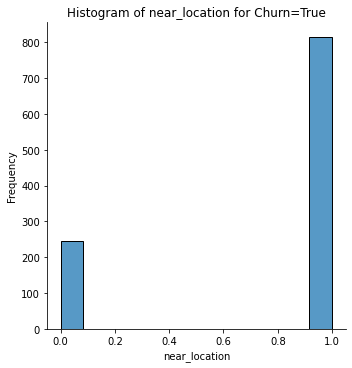

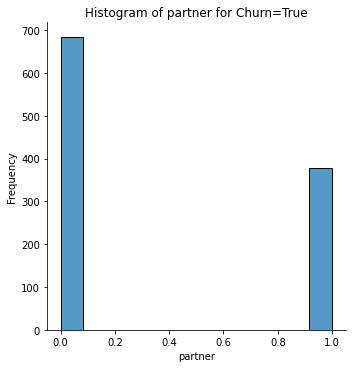

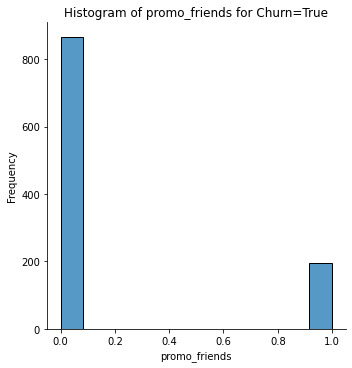

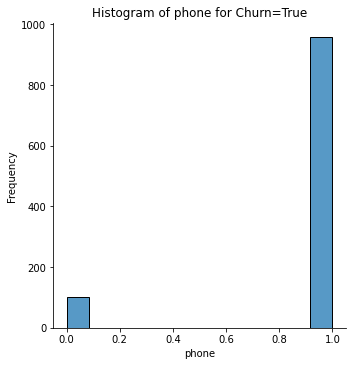

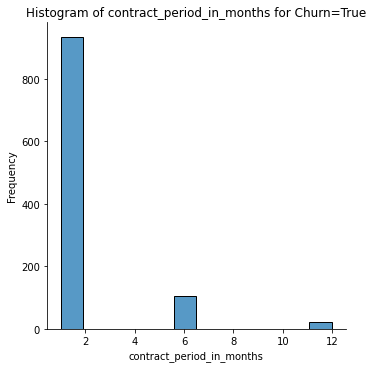

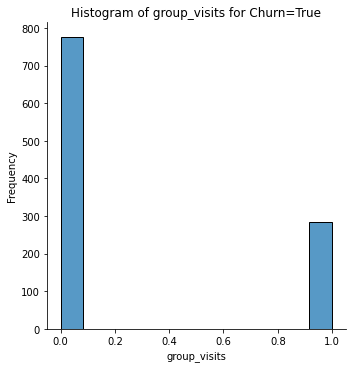

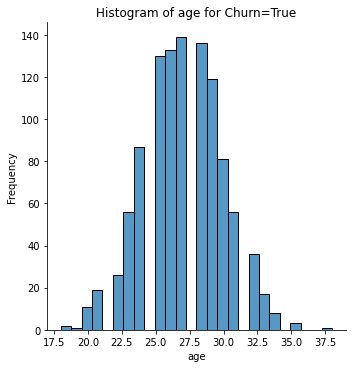

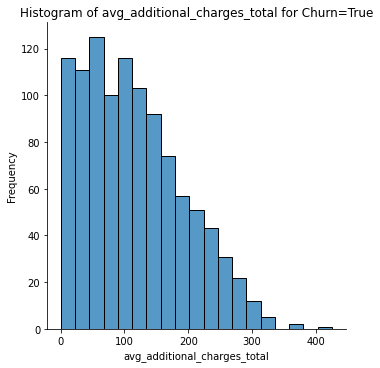

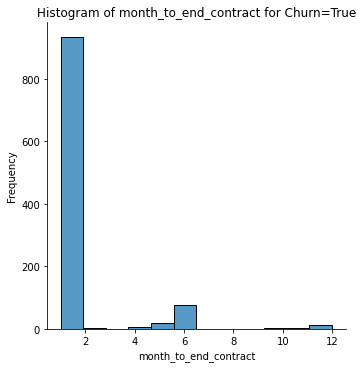

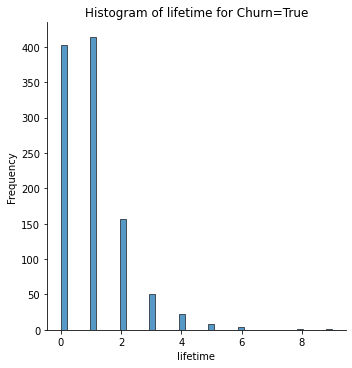

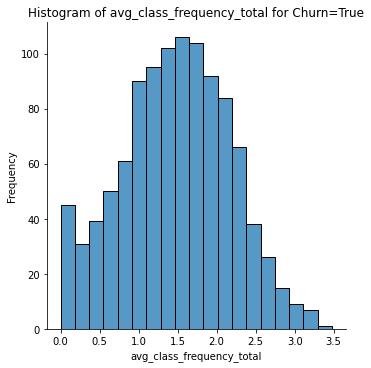

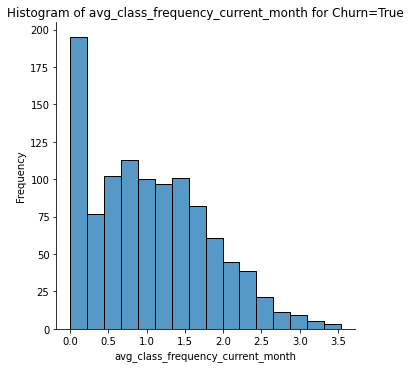

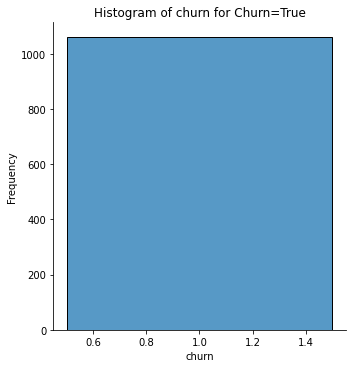

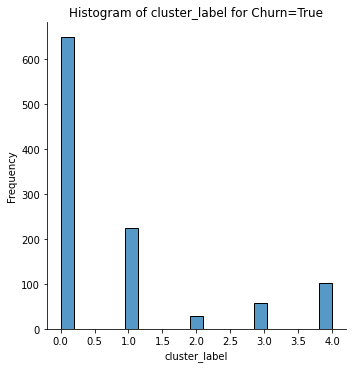

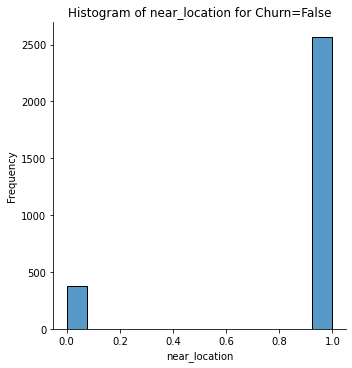

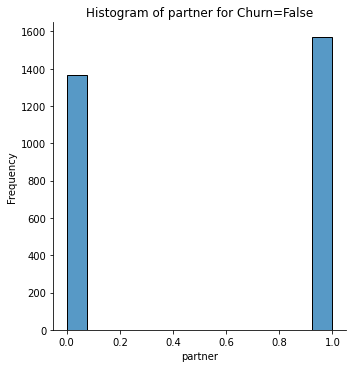

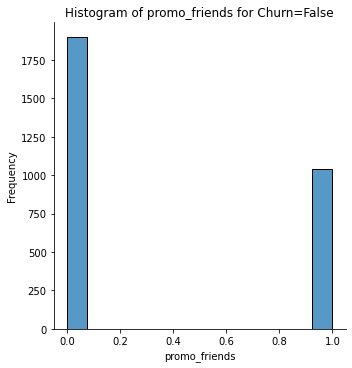

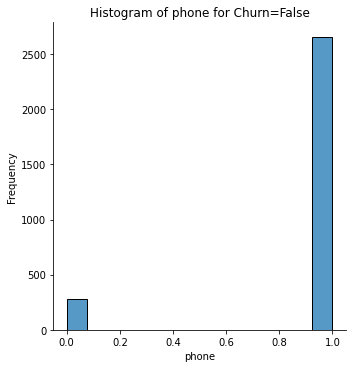

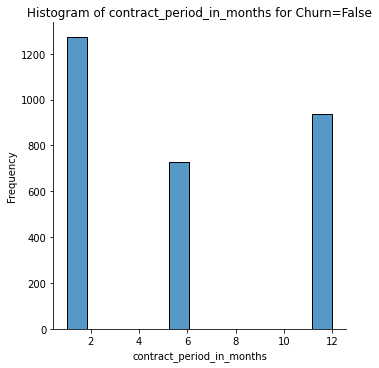

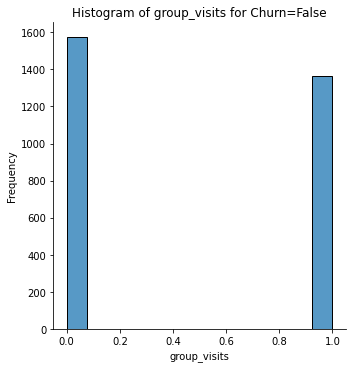

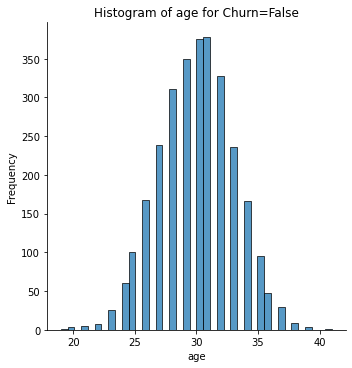

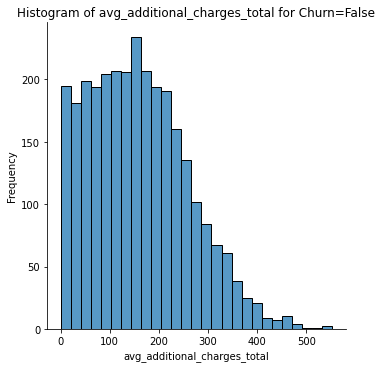

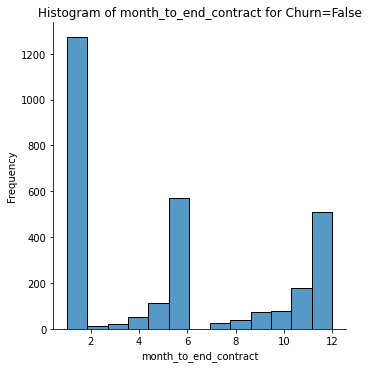

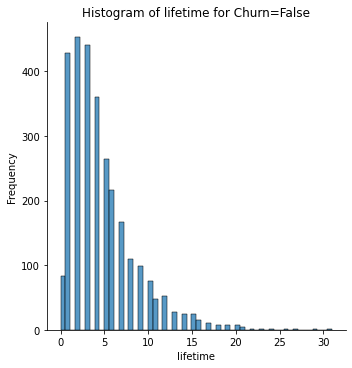

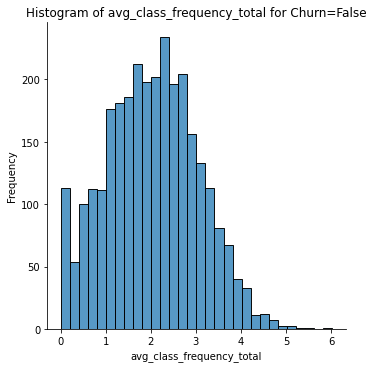

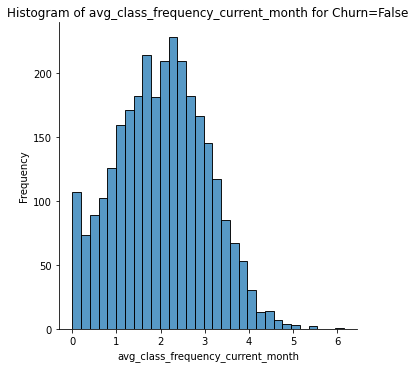

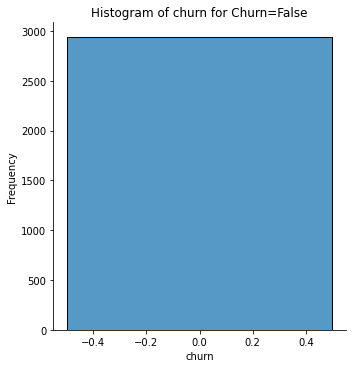

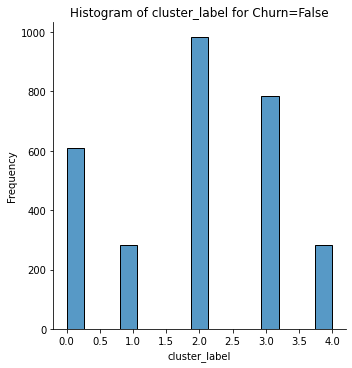

In [33]:
for churn_value in [True, False]:
    churned_values = gym_data[gym_data['churn'] == churn_value]
    
    for col in gym_data.columns[1:]:
        sns.displot(churned_values[col], kde=False)
        
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {col} for Churn={churn_value}')
        
        sns.despine()
        
        plt.show()


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the displots of all columns and whether the churn was true or false, we arrive at the following observations:
    
**For the churn=true group:**
    
* Most subscribers were near the location, had no partner affiliation or promo_friends, and no group visits.
    
* They had less than 2 months of contract length (this is also the time they had left on their contract), and were gym members for 0 or 1 months.
    
* The significant age group was 25-29.
    
* The avergae additional charges was under 150.
    
* They averaged 1-2 classes per week, but dropped to 0 the following month.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
    
**For the churn=false group:**
    
* Most subscribers were near the location, had  partner affiliation (not by such a big gap), had no promo_friends, and no group visits (not by such a big gap).
    
* They had less than 2 months of contract length (this is also the time they had left on their contract), and were gym members for 2-4 months.
    
* The significant age group was 28-32.
    
* The avergae additional charges was in the range of 0-240, with the most values at around 160.
    
* They averaged 1-3 classes per week (most values at 2), but dropped to 1.5-2.5 the following month.

In [11]:
gym_data.corrwith(gym_data['churn'])

gender                               0.000708
near_location                       -0.128098
partner                             -0.157986
promo_friends                       -0.162233
phone                               -0.001177
contract_period_in_months           -0.389984
group_visits                        -0.175325
age                                 -0.404735
avg_additional_charges_total        -0.198697
month_to_end_contract               -0.381393
lifetime                            -0.438220
avg_class_frequency_total           -0.249715
avg_class_frequency_current_month   -0.412348
churn                                1.000000
dtype: float64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Above, we displayed a correlation matrix related only to the churn column above. We see that most of the relationships with the churn column are negative, but not as strongly correlated. The one positive correlation (gender) is very very low, meaning that there isn't much of a positive correlation. 
    
In the cell below, we will display the correlation matrix for the entire gym_data data frame.

In [12]:
gym_data.corr()

,gender,near_location,partner,promo_friends,phone,contract_period_in_months,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period_in_months,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Some notable correlation from the matrix above:
    
month_to_end_contract and contract_period_in_months (0.97), avg_class_frequency_total and avg_class_frequency_current_month (0.95). Considering the invloved columns, we should have reasonably expected them to be strongly correlated. The correlation matrix merely confirms basic intuition.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 3. Build a model to predict user churn**
    
Build a binary classification model for customers where the target feature is the user's leaving next month.
    
* Divide the data into train and validation sets using the train_test_split() function.
    
* Train the model on the train set with two methods:
    
    * logistic regression
    
    * random forest
    
* Evaluate accuracy, precision, and recall for both models using the validation data. Use them to compare the models. Which model gave better results?
    
Remember to indicate the random_state parameter when dividing data and defining the algorithm.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
First, we will train_test_split and scale the model.

In [13]:
X = gym_data.drop('month_to_end_contract', axis=1)
y = gym_data['month_to_end_contract']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
First we will run a Random Forest Classifier.

In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_st, y_train)
rf_pred = rf_model.predict(X_test_st)
rf_prob = rf_model.predict_proba(X_test_st)[:,1]

In [15]:
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy: {:.2f}'.format(rf_accuracy))

rf_r2 = r2_score(y_test, rf_pred)
print('R2: {:.2f}'.format(rf_r2))

rf_precision = precision_score(y_test, rf_pred, average='weighted')
print('Precision: {:.2f}'.format(rf_precision))

rf_recall = recall_score(y_test, rf_pred, average='weighted')
print('Recall: {:.2f}'.format(rf_recall))

Accuracy: 0.83
R2: 0.93
Precision: 0.77
Recall: 0.83


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now we will test using Logistic Regression.

In [16]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)
lr_pred = lr_model.predict(X_test_st)
lr_prob = lr_model.predict_proba(X_test_st)[:,1]

In [17]:
lr_accuracy = accuracy_score(y_test, lr_pred)
print('Accuracy: {:.2f}'.format(lr_accuracy))

lr_r2 = r2_score(y_test, lr_pred)
print('R2: {:.2f}'.format(lr_r2))

lr_precision = precision_score(y_test, lr_pred, average='weighted')
print('Precision: {:.2f}'.format(lr_precision))

lr_recall = recall_score(y_test, lr_pred, average='weighted')
print('Recall: {:.2f}'.format(lr_recall))

Accuracy: 0.84
R2: 0.94
Precision: 0.75
Recall: 0.84


/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By comparing the random forest classifier and logistic regression, we can see from the following metrics that:
    
* The logistic regression is slightly more accurate than the random forest (0.84 compared to 0.83). The same is true for the recall metric (same scores) and R2 score (0.94 compared to 0.93).
    
* The random forest is slightly more precise than logistic regression (0.77 compared to 0.75).
    

Overall, all metrics have pretty strong metric scores, showing us that our model is working pretty well.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 4. Create user clusters**
    
Set aside the column with data on churn and identify object (user) clusters:
    
* Standardize the data.
    
* Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram. Note: rendering the dendrogram may take time! Use the resulting graph to estimate the number of clusters you can single out.
    
* Train the clustering model with the K-means algorithm and predict customer clusters. (Let the number of clusters be n=5, so that it'll be easier to compare your results with those of other students. However, in real life, no one will give you such hints, so you'll have to decide based on the graph from the previous step.)
    
* Look at the mean feature values for clusters. Does anything catch your eye?
    
* Plot distributions of features for the clusters. Do you notice anything?
    
* Calculate the churn rate for each cluster (use the groupby() method). Do they differ in terms of churn rate? Which clusters are prone to leaving, and which are loyal?

In [18]:
X_cluster = gym_data.drop('churn', axis=1)
scaler = StandardScaler()
scaler.fit(X_cluster)
X_scaled = scaler.transform(X_cluster)

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The churn column has been set aside, and the data has been standardized.

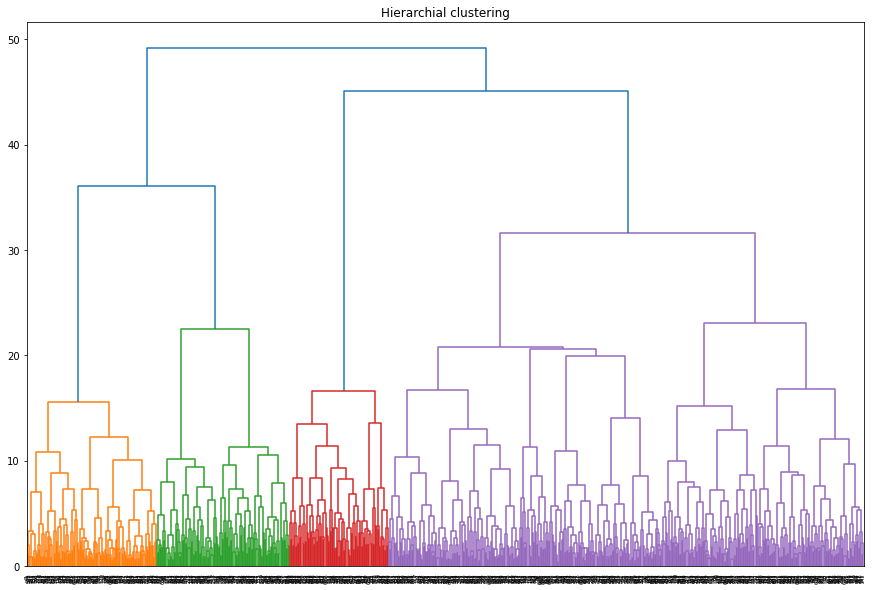

In [19]:
linked = linkage(X_test_st, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
It appears is if we have 4 clusters to consider.

In [29]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(X_scaled)

gym_data['cluster_label'] = labels
gym_data['cluster_label']

0       4
1       2
2       0
3       2
4       0
       ..
3995    2
3996    0
3997    2
3998    2
3999    4
Name: cluster_label, Length: 4000, dtype: int32

In [30]:
mean_feature_values = gym_data.groupby('cluster_label').mean()
mean_feature_values

,gender,near_location,partner,promo_friends,phone,contract_period_in_months,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_label,,,,,,,,,,,,,,
0,0.485692,1.000000,0.351351,0.240064,1.000000,1.951510,0.339428,28.171701,131.683291,1.859300,2.425278,1.245607,1.010188,0.515898
1,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
2,0.501484,0.959446,0.783383,0.574679,1.000000,10.890208,0.542038,29.972305,160.789285,9.952522,4.723046,1.985286,1.978306,0.027695
3,0.561237,0.976219,0.354340,0.229489,0.998811,2.650416,0.476813,30.122473,161.390756,2.445898,4.926278,2.844552,2.842418,0.067776
4,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the mean feature values for clusters, we can notice that the contract_period_in_months is mostly under 3 months. It would seem as if most users are nearing their end of their subscription.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
In order to plot  displots for all possible 2 column combinations, we will import itertools, create a function, and create a for loop to go over all possible combinations.

In [36]:
#import itertools

#def create_scatterplot(gym_data, x_name, y_name, cluster_label):
    #plt.figure(figsize = (5, 5))
    #sns.scatterplot(x=gym_data[x_name], y=gym_data[y_name],
           #hue = gym_data[cluster_label], palette = 'Paired'
       #)
    #plt.title('{} vs {}'.format(x_name, y_name))
    #plt.show()

#columns = gym_data.columns.tolist()

#column_combinations = list(itertools.combinations(columns, 2))

#for combination in column_combinations:
    #x_col, y_col = combination
    #plot = create_scatterplot(gym_data, x_col, y_col, 'cluster_label')
    #print(f"Scatter plot for {x_col} vs {y_col}")
    #print(plot)
    


<Figure size 360x360 with 0 Axes>

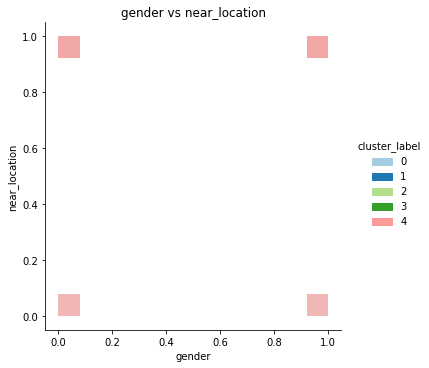

Displot for gender vs near_location


<Figure size 360x360 with 0 Axes>

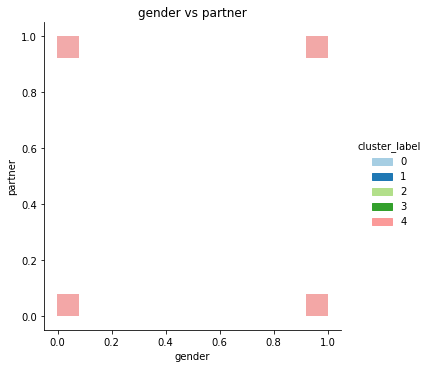

Displot for gender vs partner


<Figure size 360x360 with 0 Axes>

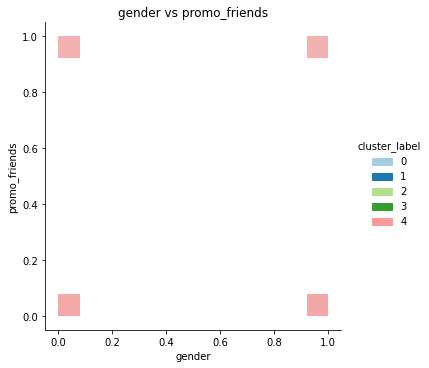

Displot for gender vs promo_friends


<Figure size 360x360 with 0 Axes>

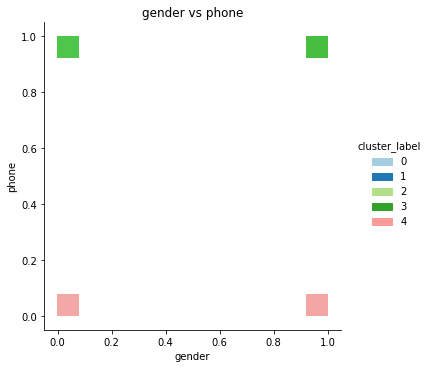

Displot for gender vs phone


<Figure size 360x360 with 0 Axes>

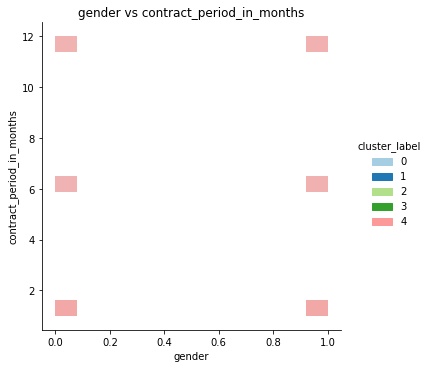

Displot for gender vs contract_period_in_months


<Figure size 360x360 with 0 Axes>

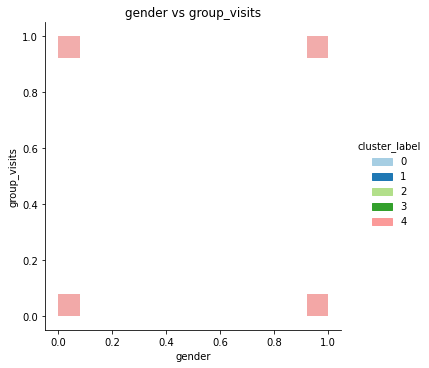

Displot for gender vs group_visits


<Figure size 360x360 with 0 Axes>

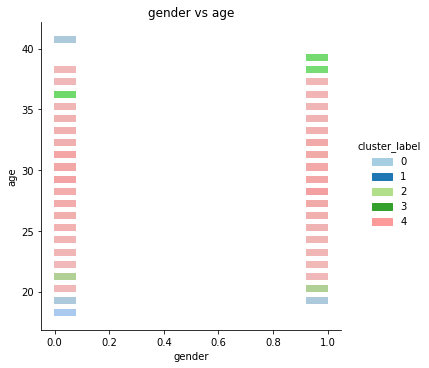

Displot for gender vs age


<Figure size 360x360 with 0 Axes>

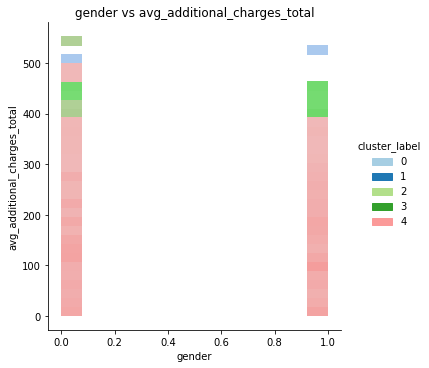

Displot for gender vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

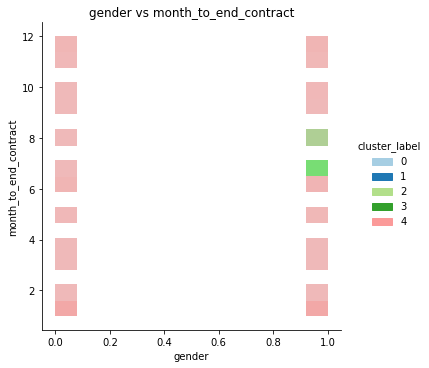

Displot for gender vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

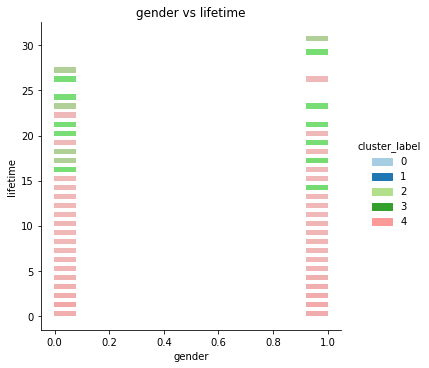

Displot for gender vs lifetime


<Figure size 360x360 with 0 Axes>

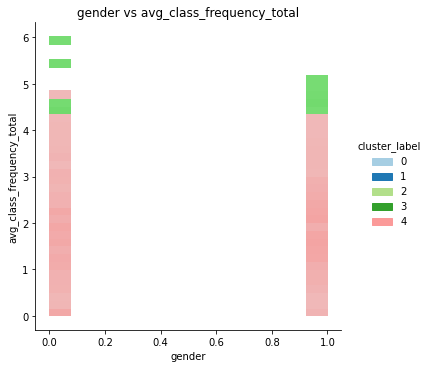

Displot for gender vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

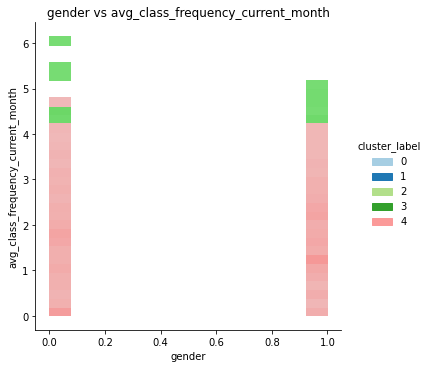

Displot for gender vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

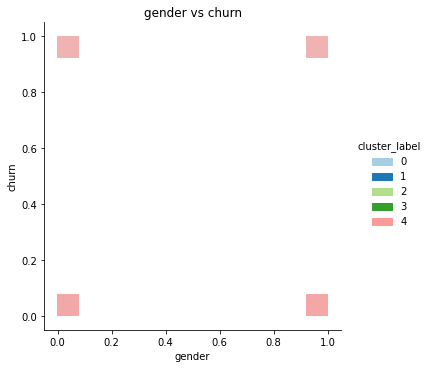

Displot for gender vs churn


<Figure size 360x360 with 0 Axes>

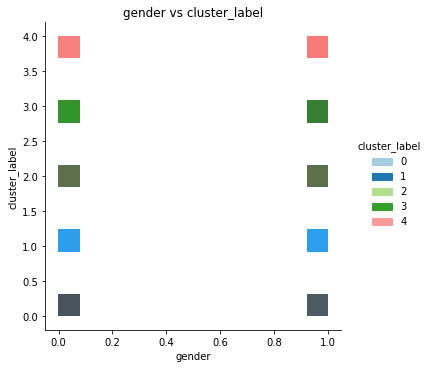

Displot for gender vs cluster_label


<Figure size 360x360 with 0 Axes>

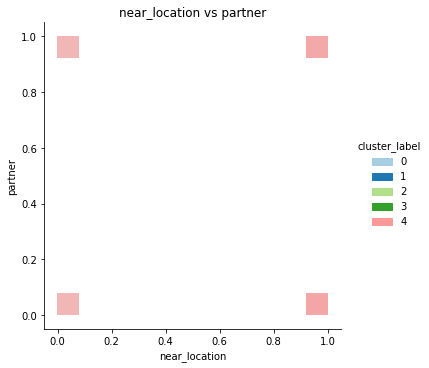

Displot for near_location vs partner


<Figure size 360x360 with 0 Axes>

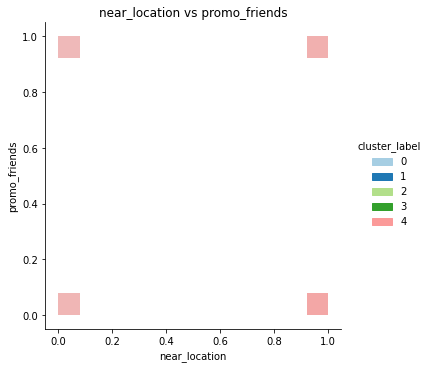

Displot for near_location vs promo_friends


<Figure size 360x360 with 0 Axes>

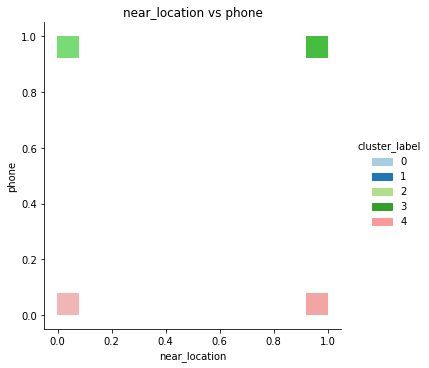

Displot for near_location vs phone


<Figure size 360x360 with 0 Axes>

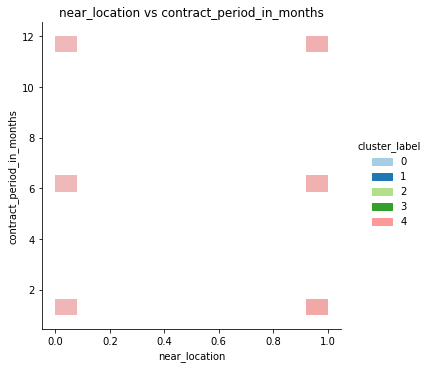

Displot for near_location vs contract_period_in_months


<Figure size 360x360 with 0 Axes>

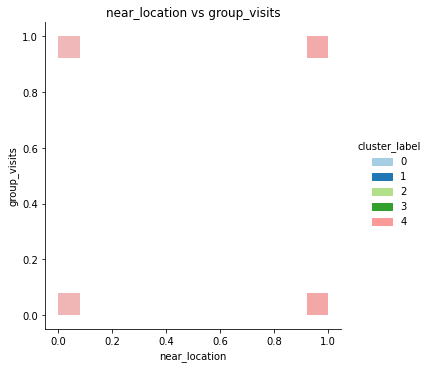

Displot for near_location vs group_visits


<Figure size 360x360 with 0 Axes>

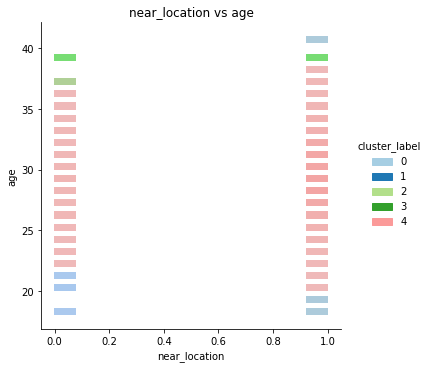

Displot for near_location vs age


<Figure size 360x360 with 0 Axes>

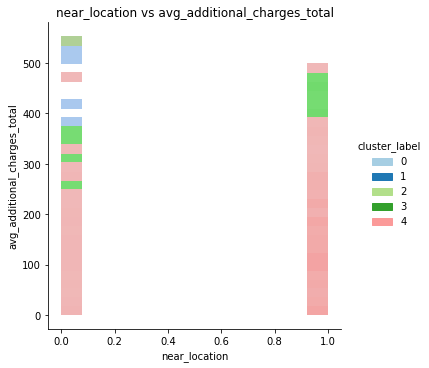

Displot for near_location vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

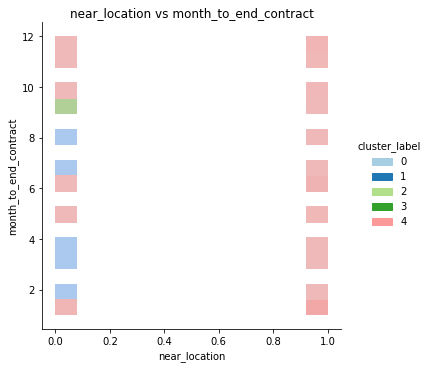

Displot for near_location vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

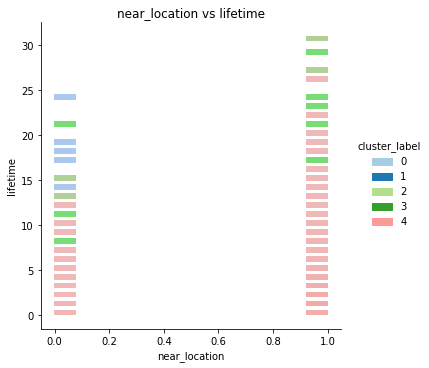

Displot for near_location vs lifetime


<Figure size 360x360 with 0 Axes>

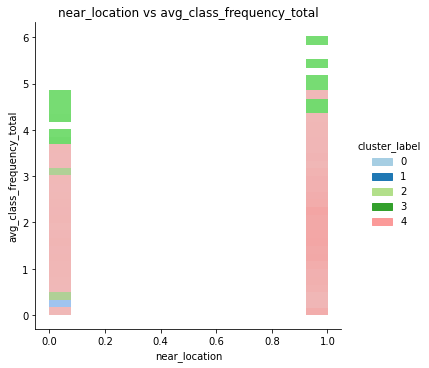

Displot for near_location vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

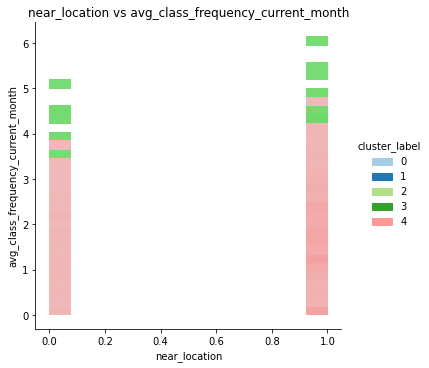

Displot for near_location vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

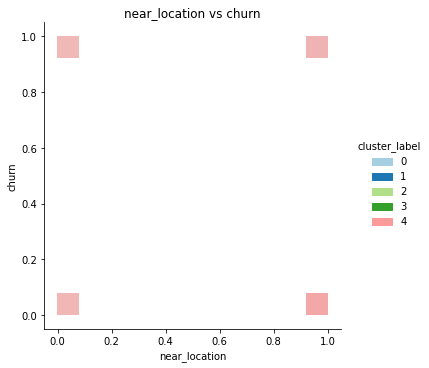

Displot for near_location vs churn


<Figure size 360x360 with 0 Axes>

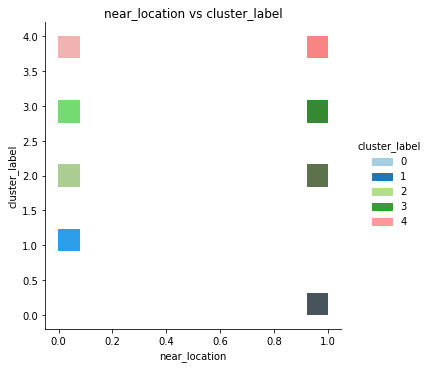

Displot for near_location vs cluster_label


<Figure size 360x360 with 0 Axes>

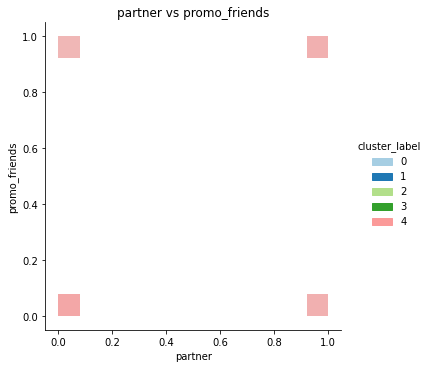

Displot for partner vs promo_friends


<Figure size 360x360 with 0 Axes>

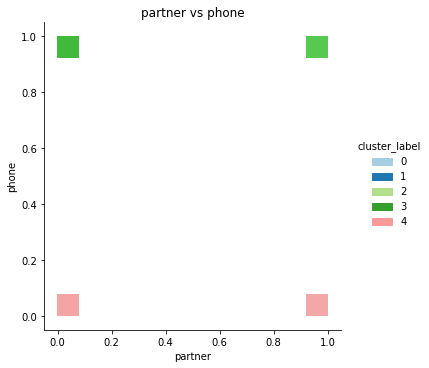

Displot for partner vs phone


<Figure size 360x360 with 0 Axes>

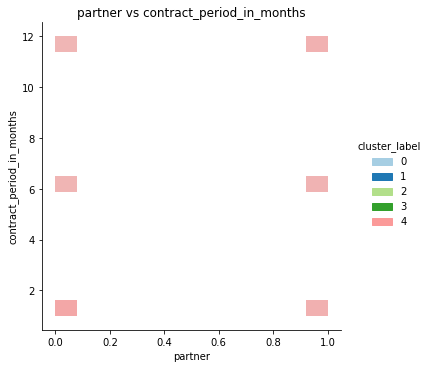

Displot for partner vs contract_period_in_months


<Figure size 360x360 with 0 Axes>

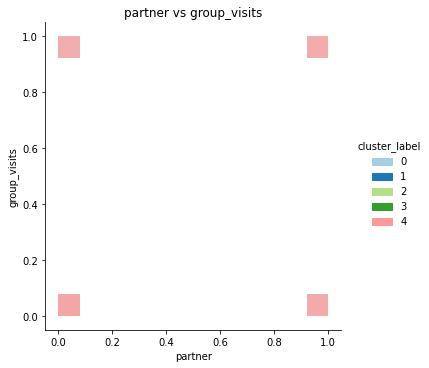

Displot for partner vs group_visits


<Figure size 360x360 with 0 Axes>

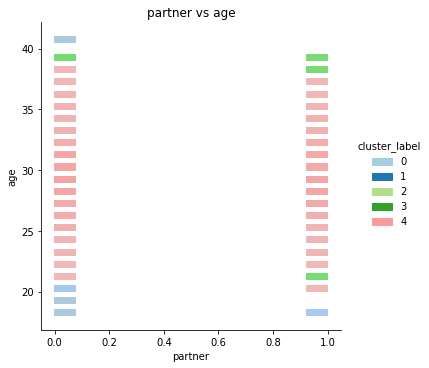

Displot for partner vs age


<Figure size 360x360 with 0 Axes>

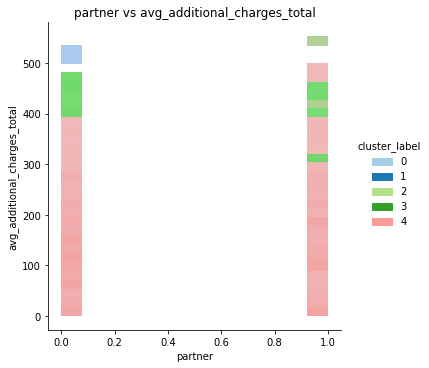

Displot for partner vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

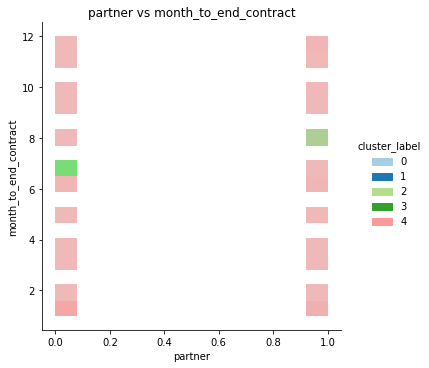

Displot for partner vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

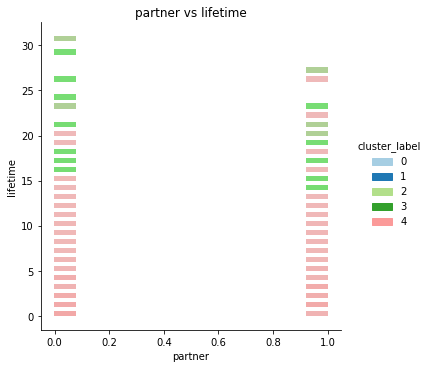

Displot for partner vs lifetime


<Figure size 360x360 with 0 Axes>

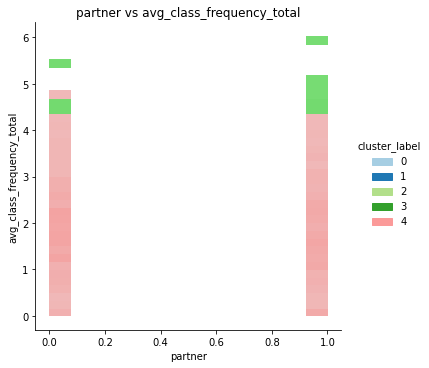

Displot for partner vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

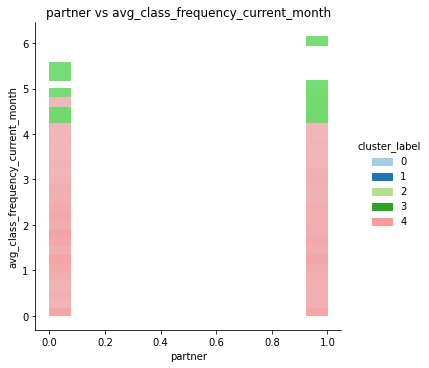

Displot for partner vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

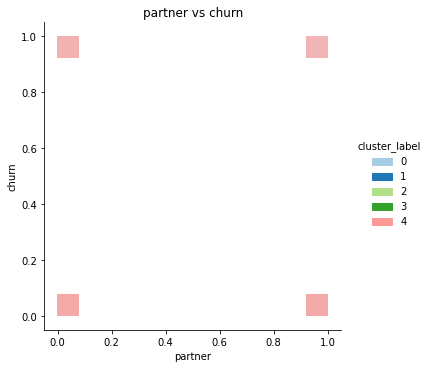

Displot for partner vs churn


<Figure size 360x360 with 0 Axes>

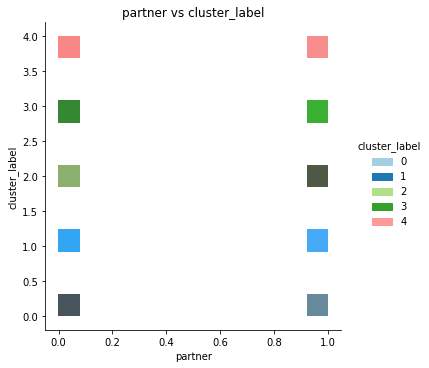

Displot for partner vs cluster_label


<Figure size 360x360 with 0 Axes>

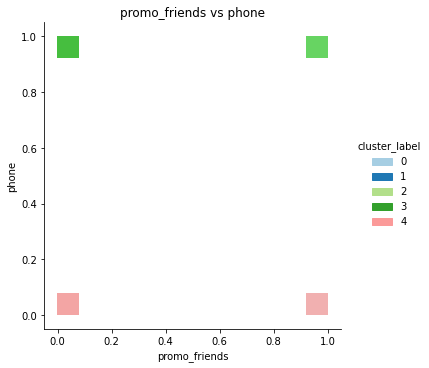

Displot for promo_friends vs phone


<Figure size 360x360 with 0 Axes>

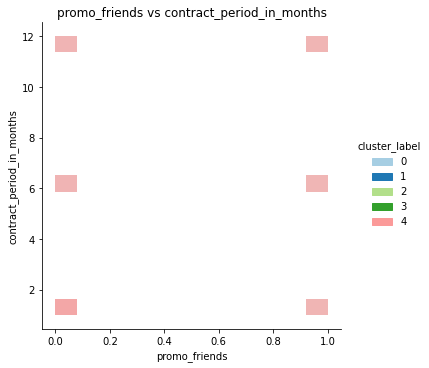

Displot for promo_friends vs contract_period_in_months


<Figure size 360x360 with 0 Axes>

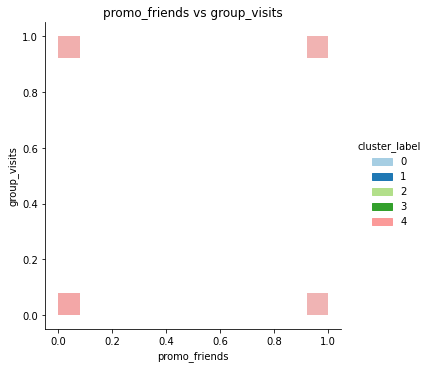

Displot for promo_friends vs group_visits


<Figure size 360x360 with 0 Axes>

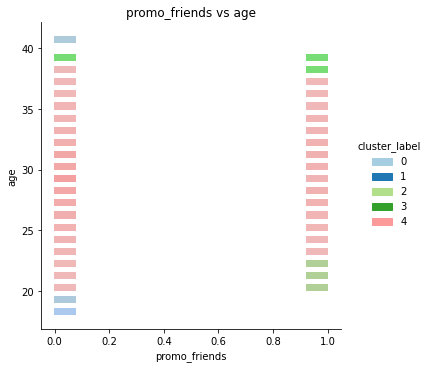

Displot for promo_friends vs age


<Figure size 360x360 with 0 Axes>

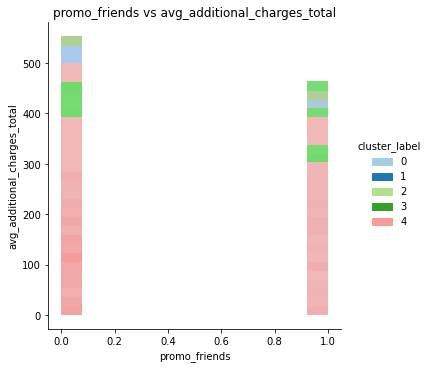

Displot for promo_friends vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

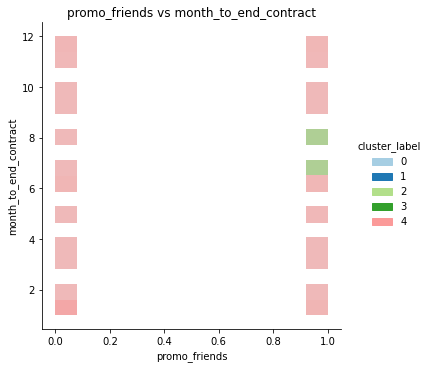

Displot for promo_friends vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

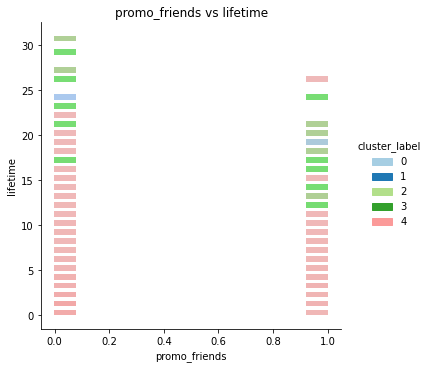

Displot for promo_friends vs lifetime


<Figure size 360x360 with 0 Axes>

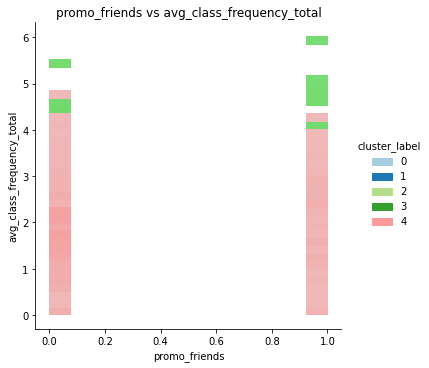

Displot for promo_friends vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

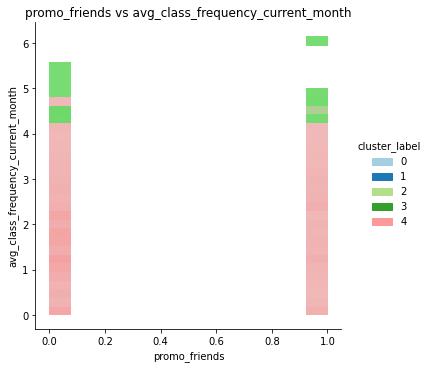

Displot for promo_friends vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

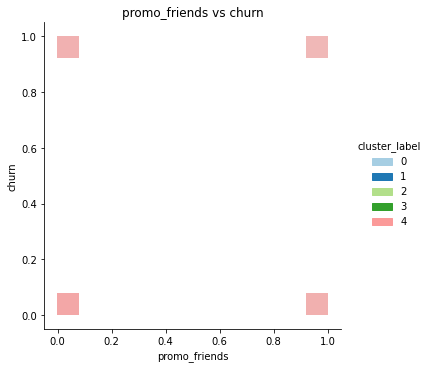

Displot for promo_friends vs churn


<Figure size 360x360 with 0 Axes>

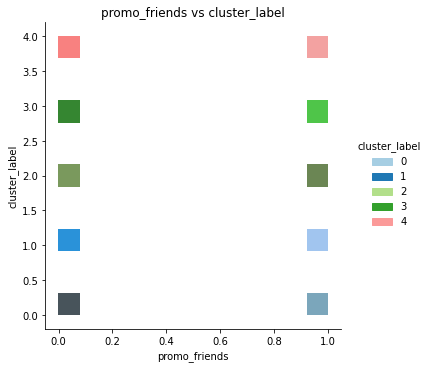

Displot for promo_friends vs cluster_label


<Figure size 360x360 with 0 Axes>

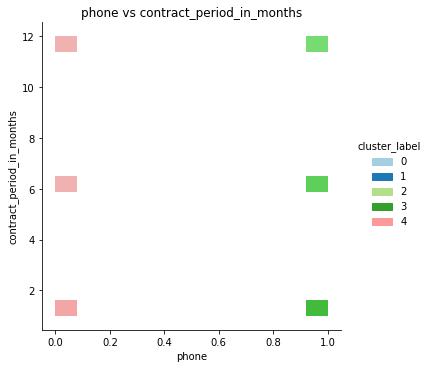

Displot for phone vs contract_period_in_months


<Figure size 360x360 with 0 Axes>

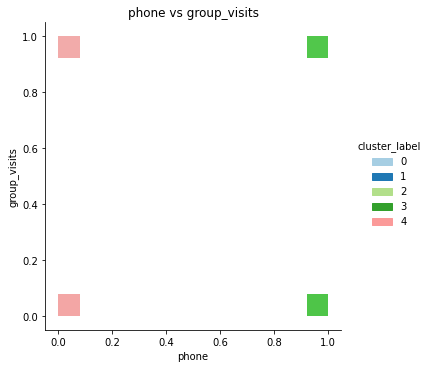

Displot for phone vs group_visits


<Figure size 360x360 with 0 Axes>

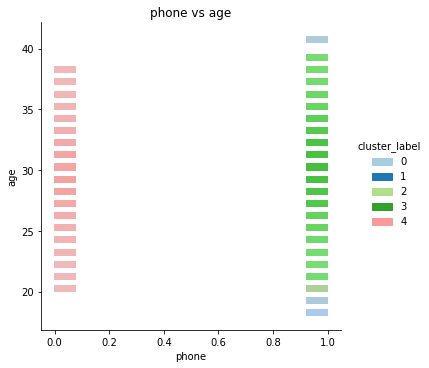

Displot for phone vs age


<Figure size 360x360 with 0 Axes>

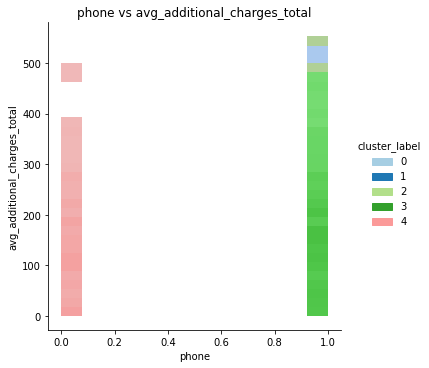

Displot for phone vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

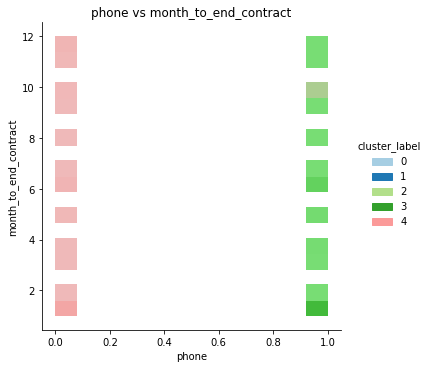

Displot for phone vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

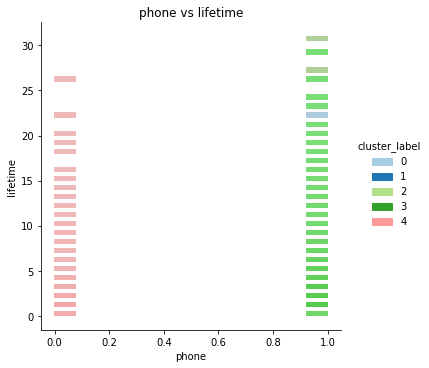

Displot for phone vs lifetime


<Figure size 360x360 with 0 Axes>

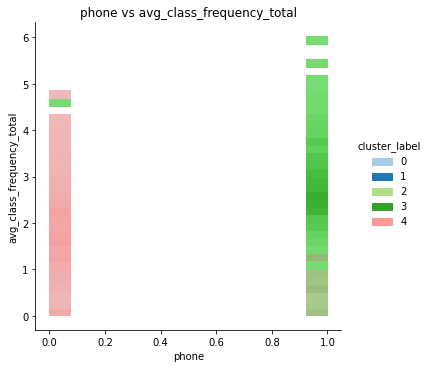

Displot for phone vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

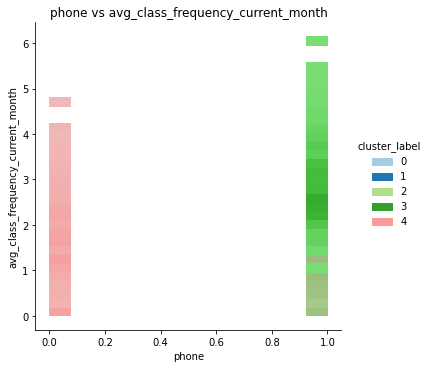

Displot for phone vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

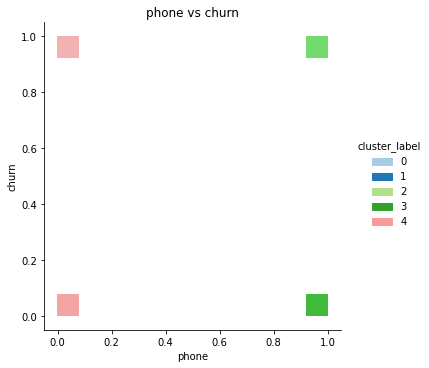

Displot for phone vs churn


<Figure size 360x360 with 0 Axes>

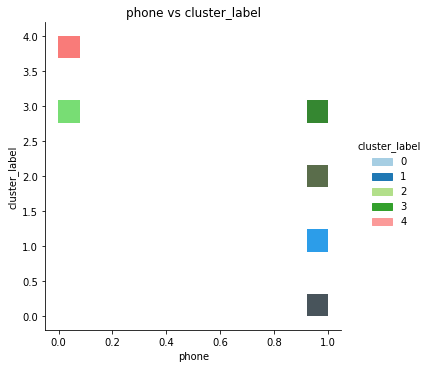

Displot for phone vs cluster_label


<Figure size 360x360 with 0 Axes>

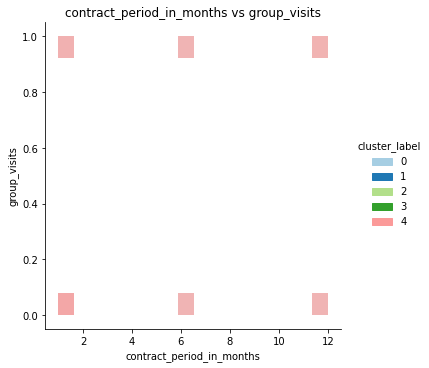

Displot for contract_period_in_months vs group_visits


<Figure size 360x360 with 0 Axes>

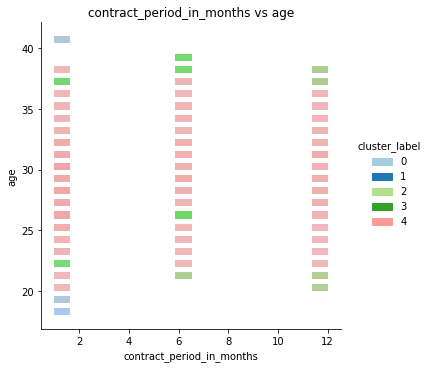

Displot for contract_period_in_months vs age


<Figure size 360x360 with 0 Axes>

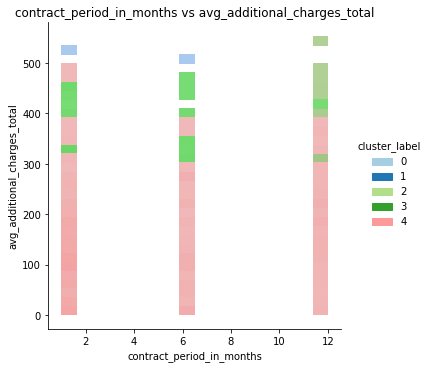

Displot for contract_period_in_months vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

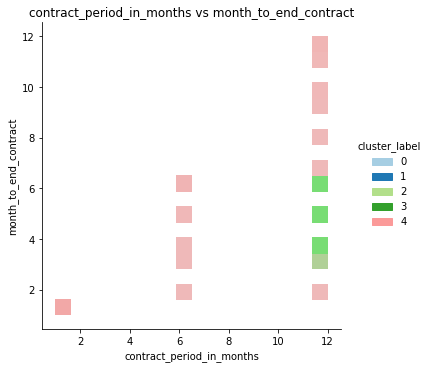

Displot for contract_period_in_months vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

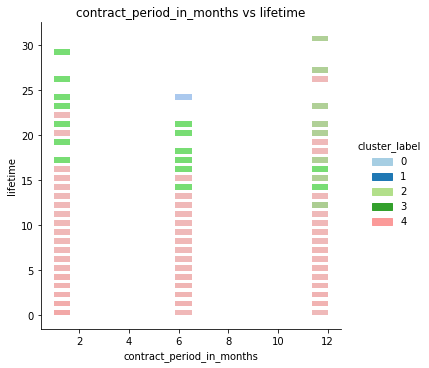

Displot for contract_period_in_months vs lifetime


<Figure size 360x360 with 0 Axes>

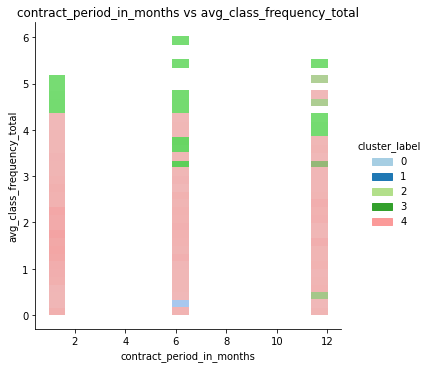

Displot for contract_period_in_months vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

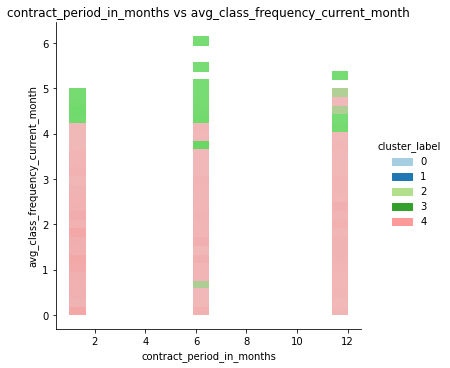

Displot for contract_period_in_months vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

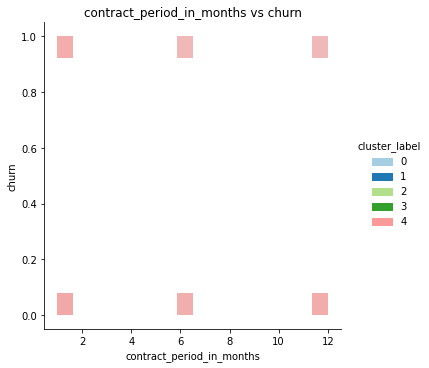

Displot for contract_period_in_months vs churn


<Figure size 360x360 with 0 Axes>

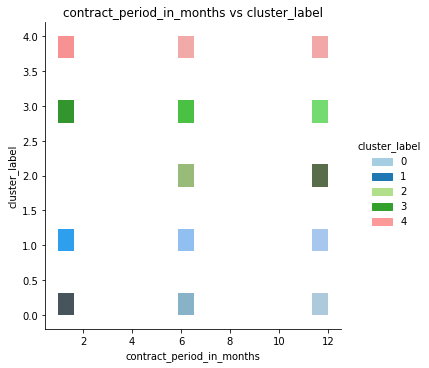

Displot for contract_period_in_months vs cluster_label


<Figure size 360x360 with 0 Axes>

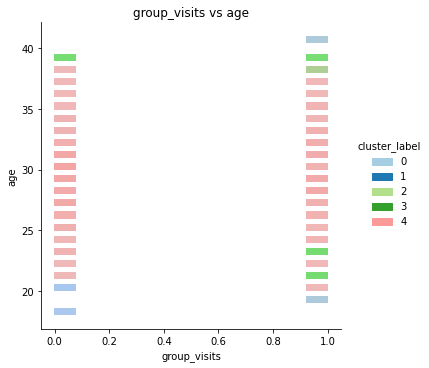

Displot for group_visits vs age


<Figure size 360x360 with 0 Axes>

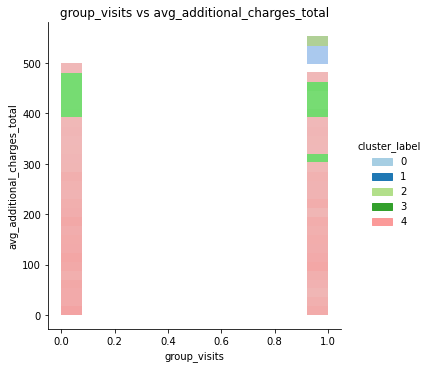

Displot for group_visits vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

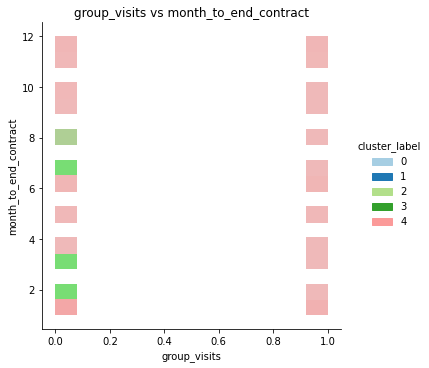

Displot for group_visits vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

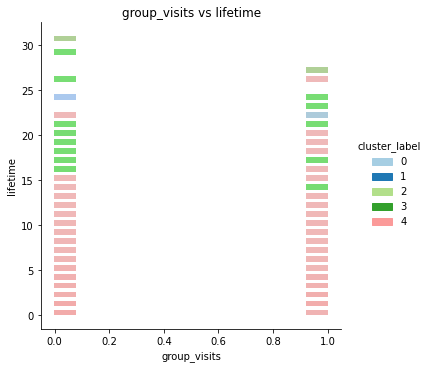

Displot for group_visits vs lifetime


<Figure size 360x360 with 0 Axes>

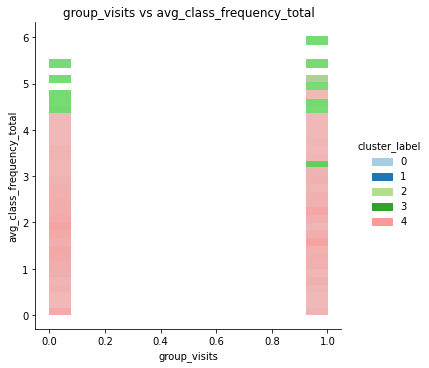

Displot for group_visits vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

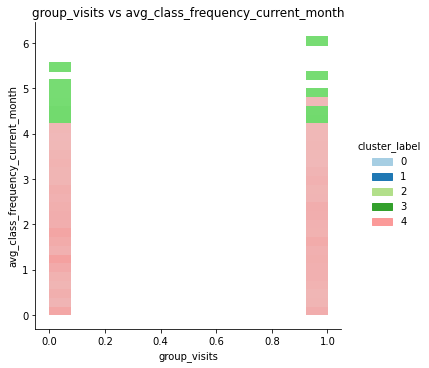

Displot for group_visits vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

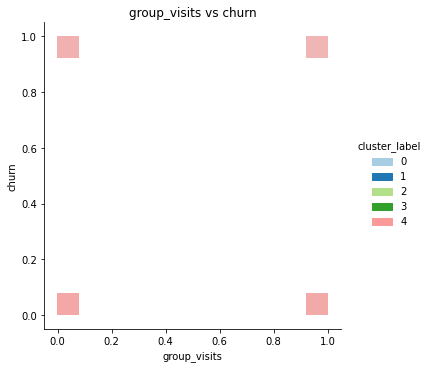

Displot for group_visits vs churn


<Figure size 360x360 with 0 Axes>

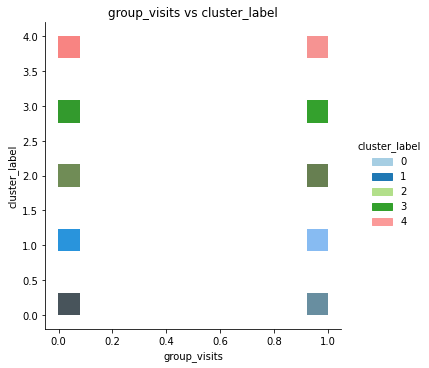

Displot for group_visits vs cluster_label


<Figure size 360x360 with 0 Axes>

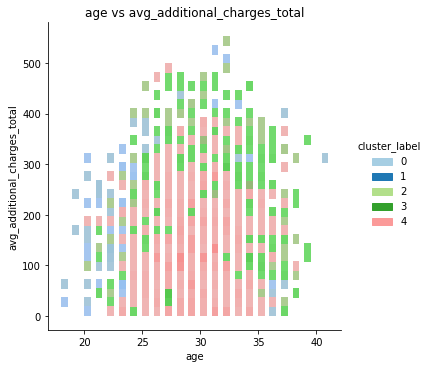

Displot for age vs avg_additional_charges_total


<Figure size 360x360 with 0 Axes>

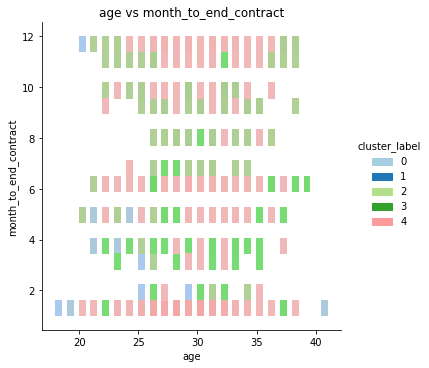

Displot for age vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

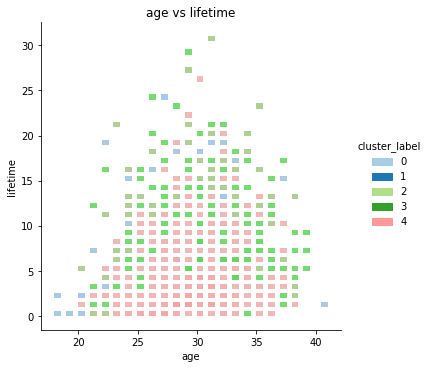

Displot for age vs lifetime


<Figure size 360x360 with 0 Axes>

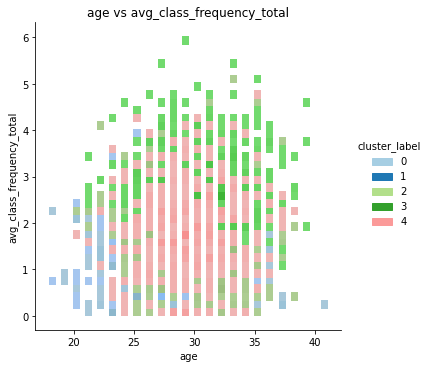

Displot for age vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

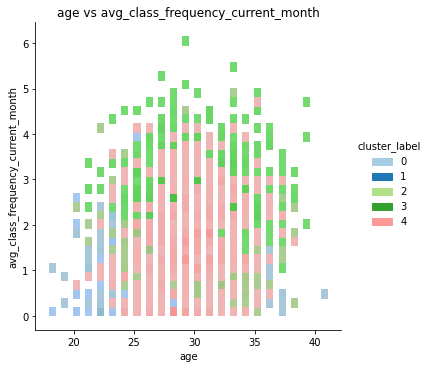

Displot for age vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

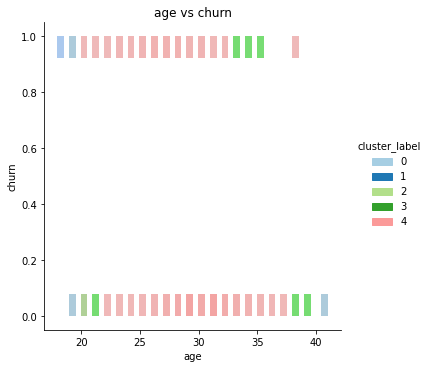

Displot for age vs churn


<Figure size 360x360 with 0 Axes>

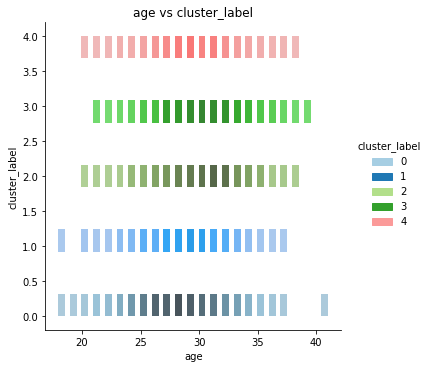

Displot for age vs cluster_label


<Figure size 360x360 with 0 Axes>

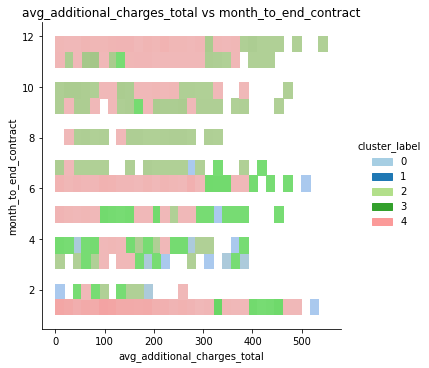

Displot for avg_additional_charges_total vs month_to_end_contract


<Figure size 360x360 with 0 Axes>

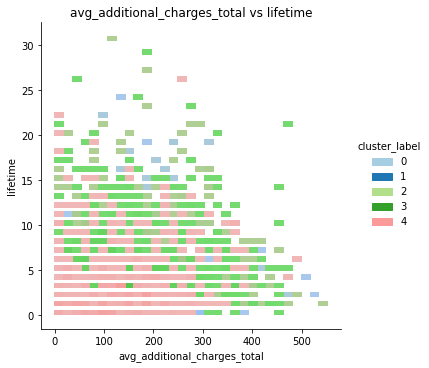

Displot for avg_additional_charges_total vs lifetime


<Figure size 360x360 with 0 Axes>

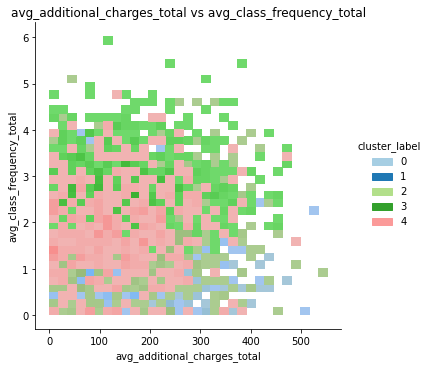

Displot for avg_additional_charges_total vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

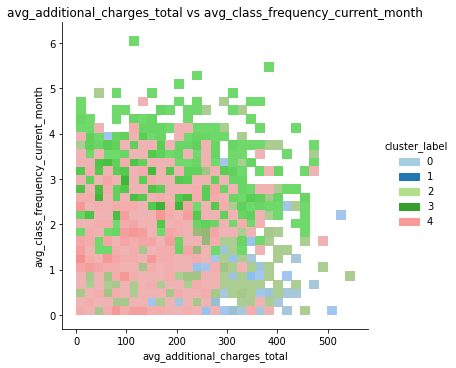

Displot for avg_additional_charges_total vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

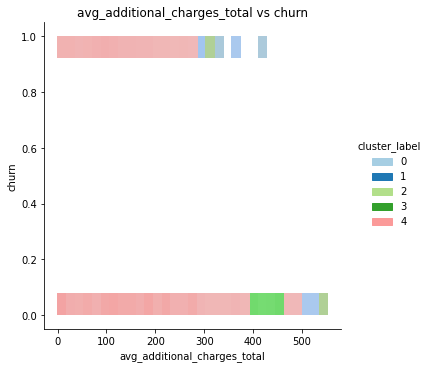

Displot for avg_additional_charges_total vs churn


<Figure size 360x360 with 0 Axes>

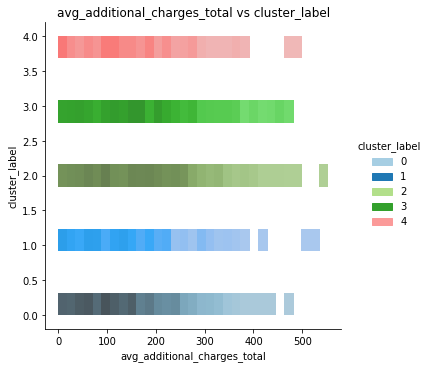

Displot for avg_additional_charges_total vs cluster_label


<Figure size 360x360 with 0 Axes>

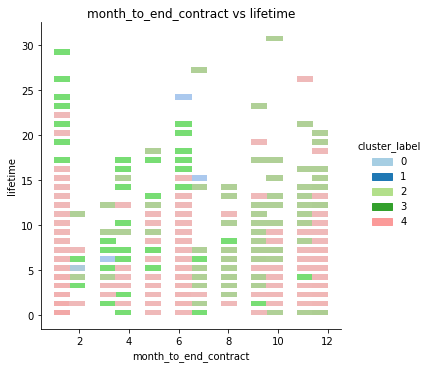

Displot for month_to_end_contract vs lifetime


<Figure size 360x360 with 0 Axes>

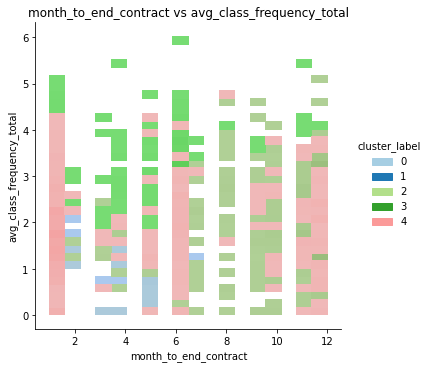

Displot for month_to_end_contract vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

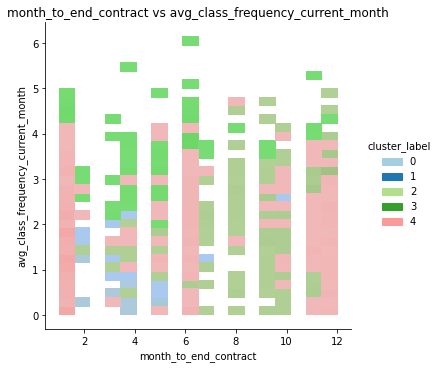

Displot for month_to_end_contract vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

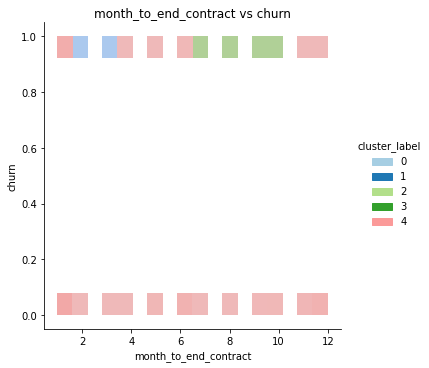

Displot for month_to_end_contract vs churn


<Figure size 360x360 with 0 Axes>

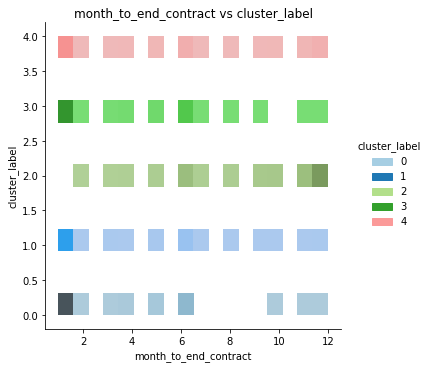

Displot for month_to_end_contract vs cluster_label


<Figure size 360x360 with 0 Axes>

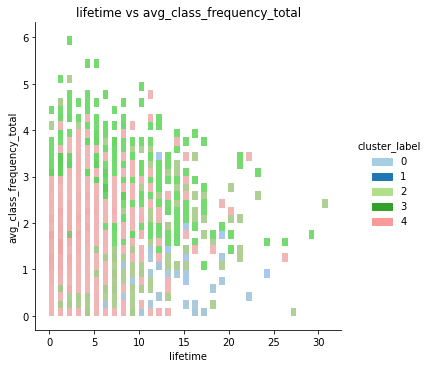

Displot for lifetime vs avg_class_frequency_total


<Figure size 360x360 with 0 Axes>

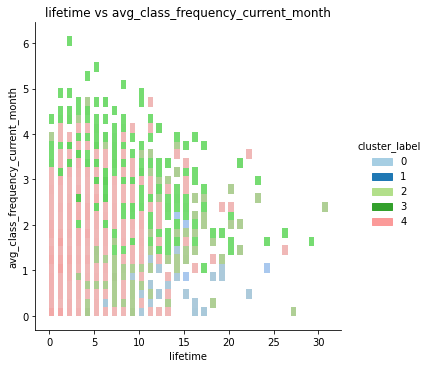

Displot for lifetime vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

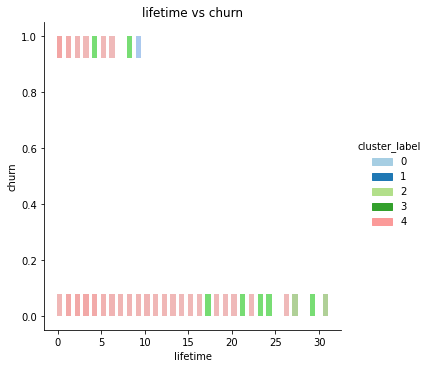

Displot for lifetime vs churn


<Figure size 360x360 with 0 Axes>

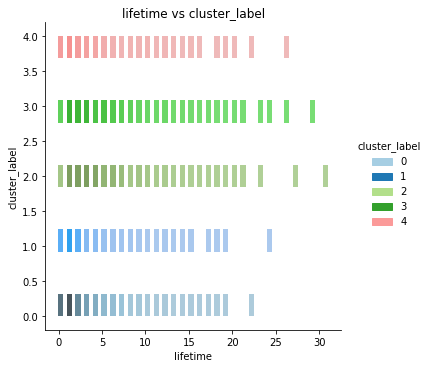

Displot for lifetime vs cluster_label


<Figure size 360x360 with 0 Axes>

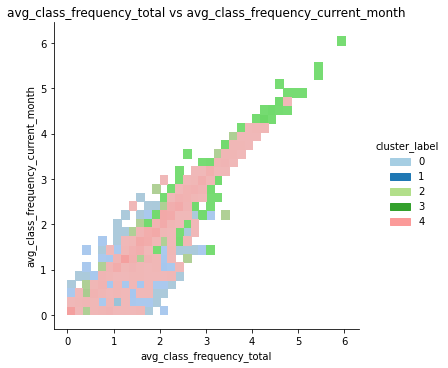

Displot for avg_class_frequency_total vs avg_class_frequency_current_month


<Figure size 360x360 with 0 Axes>

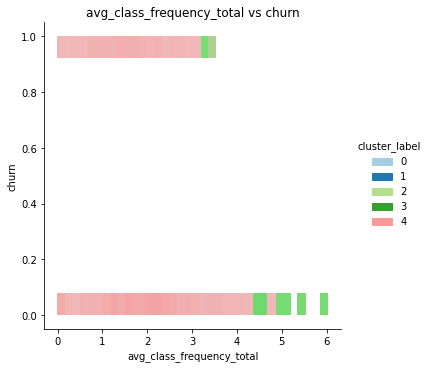

Displot for avg_class_frequency_total vs churn


<Figure size 360x360 with 0 Axes>

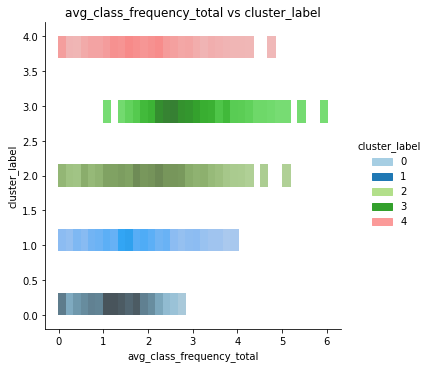

Displot for avg_class_frequency_total vs cluster_label


<Figure size 360x360 with 0 Axes>

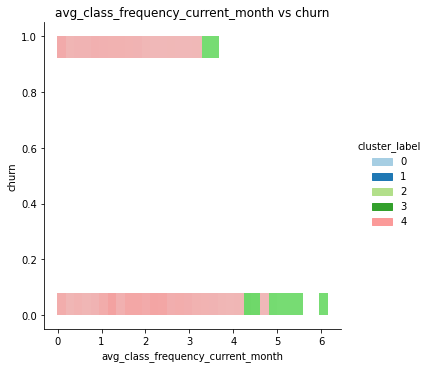

Displot for avg_class_frequency_current_month vs churn


<Figure size 360x360 with 0 Axes>

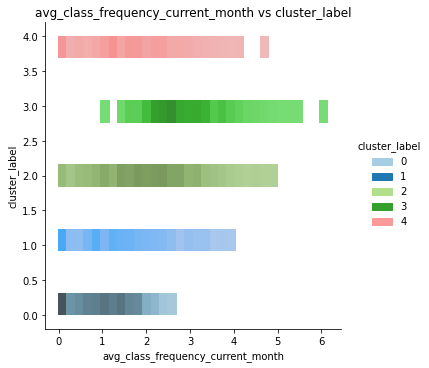

Displot for avg_class_frequency_current_month vs cluster_label


<Figure size 360x360 with 0 Axes>

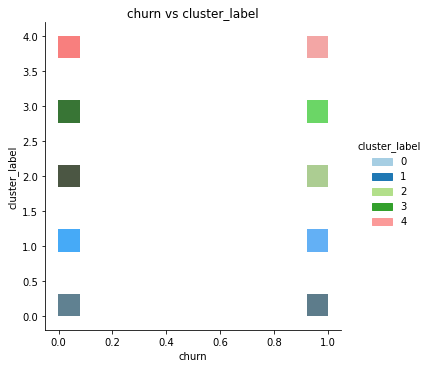

Displot for churn vs cluster_label


In [35]:
import itertools


def create_displot(gym_data, x_name, y_name, cluster_label):
    plt.figure(figsize=(5, 5))
    sns.displot(data=gym_data, x=x_name, y=y_name, hue=cluster_label, palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

columns = gym_data.columns.tolist()

column_combinations = list(itertools.combinations(columns, 2))

for combination in column_combinations:
    x_col, y_col = combination
    create_displot(gym_data, x_col, y_col, 'cluster_label')
    print(f"Displot for {x_col} vs {y_col}")


In [23]:
mean_feature_values['churn']

cluster_label
0    0.266839
1    0.074380
2    0.027397
3    0.518548
4    0.443564
Name: churn, dtype: float64

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the mean churn rate for each cluster, we see that clusters 0 and 1 are very likely to be loyal. 
    
Cluster 2 is more likely to leave. 
    
Cluster 3 is a bit even, but more likely to be loyal.
    
Cluster 4 is more likely to be loyal.

In [37]:
mean_feature_values

,gender,near_location,partner,promo_friends,phone,contract_period_in_months,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_label,,,,,,,,,,,,,,
0,0.485692,1.000000,0.351351,0.240064,1.000000,1.951510,0.339428,28.171701,131.683291,1.859300,2.425278,1.245607,1.010188,0.515898
1,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
2,0.501484,0.959446,0.783383,0.574679,1.000000,10.890208,0.542038,29.972305,160.789285,9.952522,4.723046,1.985286,1.978306,0.027695
3,0.561237,0.976219,0.354340,0.229489,0.998811,2.650416,0.476813,30.122473,161.390756,2.445898,4.926278,2.844552,2.842418,0.067776
4,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Defining a typical profile per cluster:**
    
* Cluster 0 - all are near location, less than half of them are affiliated with a partner, about a quarter of them used promo codes, they have a contract length less than 2 months, about a third of them have group visits, they are 28 years old, have an average additional charge of 131, have less than 2 months remaining on their contract, have been members for about 2.5 months, and avergae a class per week/month. More than half of the people in this cluster churned.
    
* Cluster 1 - all are not near location, about half of them are affiliated with a partner, they almost never used promo codes, they have a contract length slightly longer than 2 months, about a fifth of them have group visits, they are 28 years old, have an average additional charge of 135, have more than 2 months remaining on their contract, have been members for about 2.8 months, and avergae about 1.5 classes per week/month. Less than half of the people in this cluster churned.
    
* Cluster 2 - almost all are near location, mire than three quarters of them are affiliated with a partner, more than half of them used promo codes, they have a contract length of more than 10 months, more than half of them have group visits, they are 29 (almost 30) years old, have an average additional charge of 160, have almost 10 months remaining on their contract, have been members for about 4.7 months, and avergae almost 2 classes per week/month. Nearly none of the people in this cluster churned.
    
* Cluster 3 - almost all are near location, about a third of them are affiliated with a partner, less than a third of them used promo codes, they have a contract length a bit longer than 2 months, about half of them have group visits, they are 30 years old, have an average additional charge of 161, have about 2.5 months remaining on their contract, have been members for about 5 months, and avergae almost 3 classes per week/month. Nearly none of the people in this cluster churned.
    
* Cluster 4 - a significant share are near location, less than half of them are affiliated with a partner, less than a third of them used promo codes, none of them left their phone number, they have a contract length less than 5 months, less than half of them have group visits, they are 29 years old, have an average additional charge of 143, have less than 5 months remaining on their contract, have been members for about 4 months, and avergae almost 2 classes per week/month. More than a quarter of the people in this cluster churned.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Step 5. Come up with conclusions and basic recommendations on working with customers**
    
Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
    
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

In [24]:
mean_feature_values

,gender,near_location,partner,promo_friends,phone,contract_period_in_months,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_label,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.567887,0.975207,0.342385,0.221960,1.0,2.552538,0.473436,30.118064,161.384433,2.350649,4.893743,2.817582,2.812522,0.074380
2,0.498043,0.960861,0.783757,0.575342,1.0,10.849315,0.539139,29.974560,161.173758,9.916830,4.733855,2.003332,1.996963,0.027397
3,0.483065,1.000000,0.354839,0.241935,1.0,1.961290,0.340323,28.152419,130.975830,1.870968,2.400000,1.233958,0.996650,0.518548
4,0.495050,0.000000,0.463366,0.079208,1.0,2.374257,0.217822,28.465347,135.224414,2.219802,2.809901,1.656137,1.472887,0.443564


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Conclusions and recommendations:**
    
* Only in 1 cluster, was the mean value for group_visits greater than 0.5. It seems as if the gym goers prefer to workout alone. Maybe there is way to offer individual workout bundles/subscriptions, or set specific time slots for group or individual workouts.
    
* The mean age for all clusters is within 2 years apart. Perhaps using targeted advertising aimed at this demographic would attract more subscribers.
    
* The mean lifetime value for all clusters is less than 5 months. It could indicate that we have a lot of new subscribers, or that many of the older subscribers have left. Either way, we need to figure out how to retain them for a longer period. Maybe offer discounts on early renewal, or start a membership loyalty program.